## Armed forces personnel

 indicator army_total (2).xlsx 
    

This data is a set of time series showing the evolution of the number of active duty military personnel of 173 countries from 1985 to 2010

In [24]:
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
workdir = "F:/Datasets/"
workfile = workdir+"indicator army_total (2).xlsx"

In [7]:
army = pd.read_excel(workfile)

In [10]:
army.shape

(173, 26)

In [11]:
army.describe()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,141.000000,0,0,0,139.000000,139.000000,139.000000,158.000000,159.000000,160.000000,...,163.000000,164.000000,164.000000,166.000000,167.000000,140.000000,168.000000,168.000000,0,0
mean,154363.333333,NaN,NaN,NaN,171884.892086,169410.071942,160834.532374,152993.670886,146534.591195,142312.500000,...,170644.171779,170184.451220,169784.756098,161235.795181,168996.658683,190876.300000,160398.107143,161680.607143,NaN,NaN
std,416088.802501,NaN,NaN,NaN,430541.638632,409053.127426,377204.565211,371050.763036,346676.166331,334021.732948,...,409643.903339,409027.489535,409070.900989,414388.393079,431762.706249,441284.967493,373432.695580,374394.596661,NaN,NaN
min,100.000000,NaN,NaN,NaN,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,100.000000,100.000000,100.000000,0.000000,0.000000,130.000000,0.000000,0.000000,NaN,NaN
25%,6900.000000,NaN,NaN,NaN,10500.000000,10000.000000,10000.000000,10000.000000,11000.000000,10000.000000,...,12050.000000,12375.000000,12275.000000,10062.500000,12000.000000,12000.000000,12000.000000,12000.000000,NaN,NaN
50%,35100.000000,NaN,NaN,NaN,43000.000000,45000.000000,44000.000000,37500.000000,37000.000000,40000.000000,...,43000.000000,43550.000000,43200.000000,30500.000000,40000.000000,46500.000000,34000.000000,34000.000000,NaN,NaN
75%,108000.000000,NaN,NaN,NaN,113500.000000,126000.000000,124500.000000,111500.000000,108500.000000,112250.000000,...,161850.000000,157725.000000,160975.000000,143500.000000,152000.000000,170500.000000,142250.000000,144000.000000,NaN,NaN
max,3900000.000000,NaN,NaN,NaN,3900000.000000,3500000.000000,3200000.000000,3160000.000000,3030000.000000,2930000.000000,...,3810000.000000,3770000.000000,3750000.000000,3755000.000000,3755000.000000,3605000.000000,2885000.000000,2885000.000000,NaN,NaN


There is a lot of missing data and the differences between countries can be extreme

As the last two years 2009 and 2010 are present but the data is entirely missing these columns will be deleted, although latter they could be used as targets for prediction

In [13]:
army.drop([2009, 2010], axis=1, inplace=True)

### Preliminary EDA

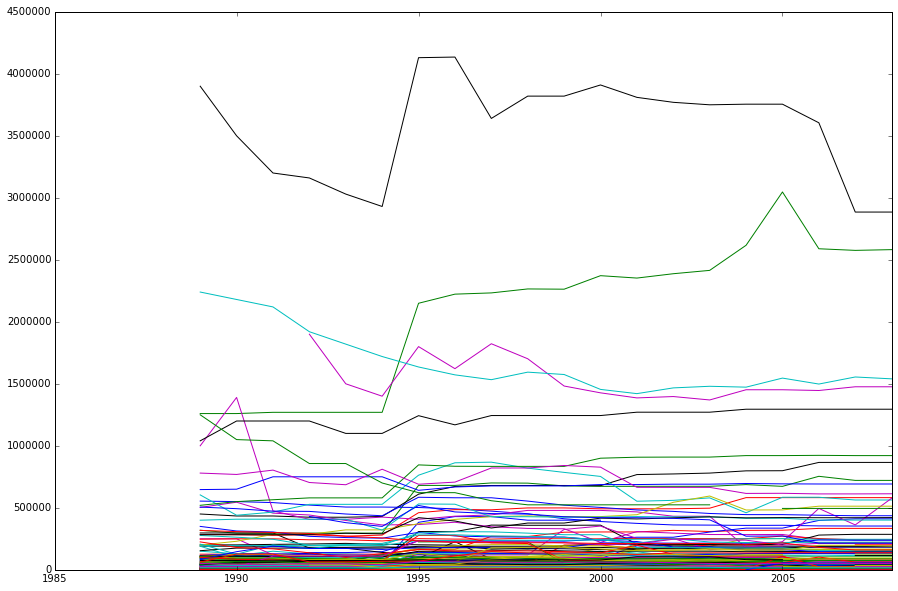

In [27]:
matplotlib.rcParams['figure.figsize'] = (15, 10)
plt.figure()
army.T.plot(legend=False)

There is a group of 5 countries with enormous armies (with more that 1 million soldiers), but most countries have armies of less than 200,000 soldiers.

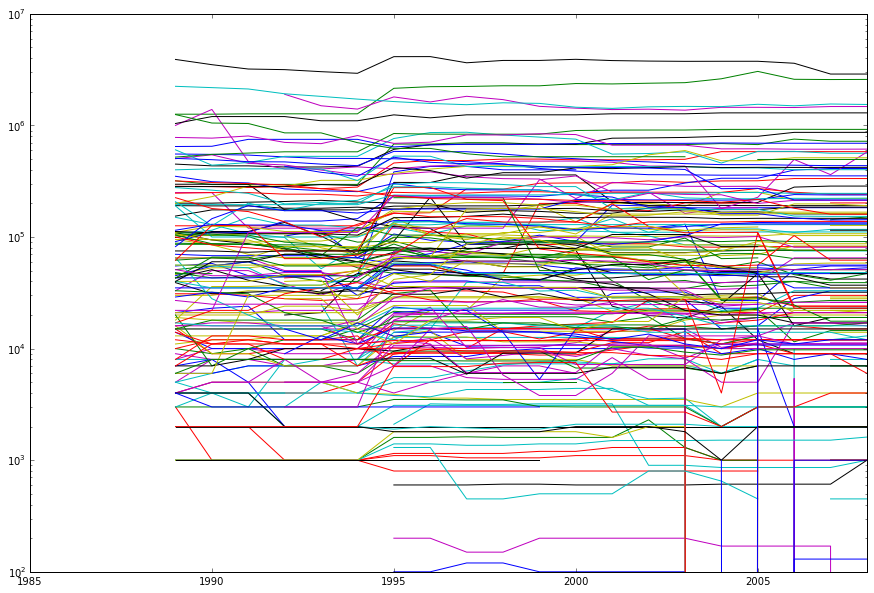

In [29]:
army.T.plot(legend=False, logy=True)

With the plot on log scale other trends are visible, like a group of big changes on 1994. However, some of the movements on the series can be caused by the missing data, so it is necessary to do data cleanup before making conclussions.

### Data Cleanup and Imputation

The missing values will be filled with linear interpolation: creating a line between the last and next valid numbers

In [39]:
army2 = army.interpolate(method='linear', axis=1, limit=5, inplace=False, limit_direction='both')

In [40]:
army2.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Afghanistan,47000,49000.000000,51000.000000,53000.000000,55000.000000,58000.000000,45000.000000,45000,45000,45000,...,400000,400000,260000,120000,130000,27000,27000,51000,51000,53000
Albania,40400,43914.285714,47428.571429,50942.857143,54457.142857,57971.428571,61485.714286,65000,65000,65000,...,67500,67500,40500,27000,22000,21500,22500,11500,14500,14500
Algeria,170000,159000.000000,148000.000000,137000.000000,126000.000000,126000.000000,126000.000000,126000,126000,126000,...,303200,305200,305200,317900,308700,318000,319000,334000,334000,334000
Angola,49500,63875.000000,78250.000000,92625.000000,107000.000000,115000.000000,150000.000000,128000,128000,120000,...,127500,117500,145500,110000,130000,118000,118000,110000,117000,117000
Antigua and Barbuda,100,110.000000,120.000000,130.000000,140.000000,150.000000,160.000000,170,180,190,...,200,200,200,200,200,170,170,170,170,0


We can compare the result with the original data. Albania and Antigua and Barbuda show the interpolation

In [41]:
army.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Afghanistan,47000,NaN,NaN,NaN,55000,58000,45000,45000,45000,45000,...,400000,400000,NaN,120000,130000,27000,27000,51000,51000,53000
Albania,40400,NaN,NaN,NaN,NaN,NaN,NaN,65000,65000,65000,...,67500,67500,40500,27000,22000,21500,22500,11500,14500,14500
Algeria,170000,NaN,NaN,NaN,126000,126000,126000,126000,126000,126000,...,303200,305200,305200,317900,308700,318000,319000,334000,334000,334000
Angola,49500,NaN,NaN,NaN,107000,115000,150000,128000,128000,120000,...,127500,117500,145500,110000,130000,118000,118000,110000,117000,117000
Antigua and Barbuda,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200,200,200,200,200,170,170,170,170,0


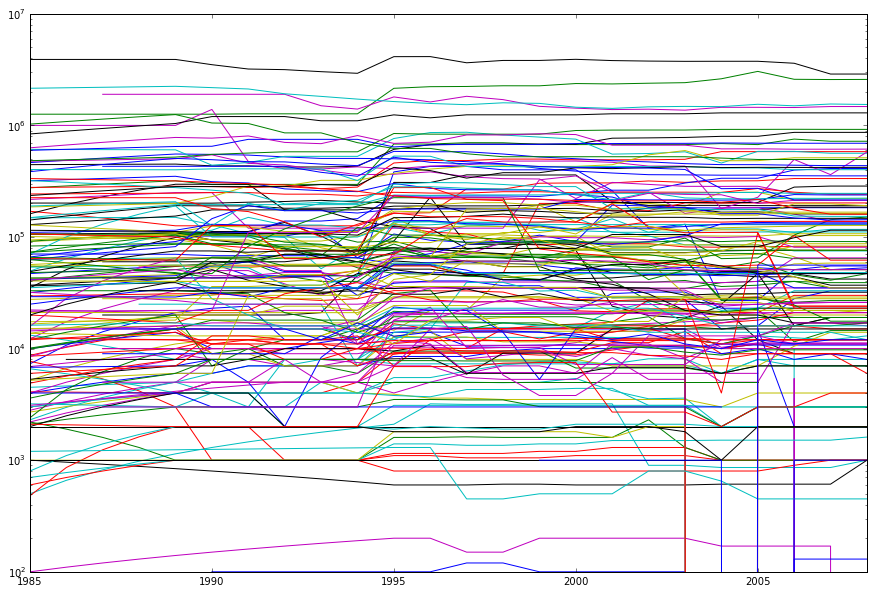

In [42]:
army2.T.plot(legend=False, logy=True)

Now lines are a little bit smoother on some parts, and we can be sure that the jumps on the series are in the data and are not artifacts of the plotting.

### Getting insights from the data

Looking for the extremes: The biggest and smallest armies

In [44]:
army2.T.describe()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,West Bank and Gaza,Vietnam,"Yemen, rep.",Zambia,Zimbabwe
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,22.000000,24.000000,24.000000,22.000000,...,24.000000,24.000000,24.000000,22.000000,24.000000,10.000000,24.000000,24.000000,24.000000,24.000000
mean,152208.333333,47900.000000,225641.666667,113568.750000,159.583333,96092.500000,40031.818182,60445.833333,43922.916667,73679.545455,...,247412.500000,1753479.166667,26271.250000,63218.181818,81933.333333,22400.000000,734625.000000,107839.583333,18604.166667,52466.666667
std,157650.129736,21628.472148,88212.007053,23013.243175,45.633623,14005.127089,14987.721526,7613.373769,6892.296096,25394.059387,...,55686.797378,303170.348124,1951.226064,24167.917269,17229.036832,28918.275652,269780.889354,34805.922251,3255.026770,7548.778575
min,27000.000000,11500.000000,126000.000000,49500.000000,0.000000,65000.000000,20000.000000,50900.000000,34600.000000,43000.000000,...,160000.000000,1420700.000000,24600.000000,20000.000000,49000.000000,0.000000,495000.000000,62000.000000,16000.000000,41000.000000
25%,46500.000000,25875.000000,134250.000000,109250.000000,147.500000,97437.500000,20250.000000,53450.000000,39750.000000,43500.000000,...,212225.000000,1524475.000000,24980.000000,40000.000000,75000.000000,0.000000,524000.000000,64075.000000,16000.000000,47500.000000
50%,53000.000000,52700.000000,219100.000000,117750.000000,170.000000,101870.000000,44000.000000,58400.000000,44000.000000,82000.000000,...,219500.000000,1584500.000000,25655.000000,72000.000000,79000.000000,0.000000,589500.000000,127000.000000,16500.000000,51000.000000
75%,290750.000000,65625.000000,311000.000000,127625.000000,200.000000,104240.000000,49000.000000,68000.000000,48418.750000,87100.000000,...,302750.000000,2127900.000000,26520.000000,86750.000000,86125.000000,56000.000000,1030250.000000,136550.000000,23000.000000,60800.000000
max,429000.000000,86500.000000,334000.000000,150000.000000,200.000000,108000.000000,61000.000000,70400.000000,55800.000000,126700.000000,...,334000.000000,2240000.000000,31900.000000,100000.000000,115000.000000,56000.000000,1250000.000000,146300.000000,23000.000000,67800.000000


In [45]:
countries = army2.T.describe()

In [46]:
countries.idxmax(axis=1)

count    Afghanistan
mean           China
std            India
min            China
25%            China
50%            China
75%            China
max            China
dtype: object

China have the biggest army, but India show the bigger variability on the size of its army

In [52]:
countries[["India", "China"]]

,India,China
count,24.000000,24.000000
mean,1946316.666667,3624583.333333
std,614788.203662,390125.165719
min,1260000.000000,2885000.000000
25%,1267500.000000,3425000.000000
50%,2228000.000000,3762500.000000
75%,2394450.000000,3900000.000000
max,3047000.000000,4135000.000000


In [47]:
countries.idxmin(axis=1)

count             Montenegro
mean                 Iceland
std                  Lesotho
min      Antigua and Barbuda
25%       West Bank and Gaza
50%       West Bank and Gaza
75%                  Iceland
max                  Iceland
dtype: object

Iceland have the smallest army, but Lesotho shows the smallest variation

In [51]:
countries[["Lesotho", "Iceland"]]

,Lesotho,Iceland
count,24,19.000000
mean,2000,96.315789
std,0,35.933662
min,2000,0.000000
25%,2000,100.000000
50%,2000,100.000000
75%,2000,110.000000
max,2000,130.000000


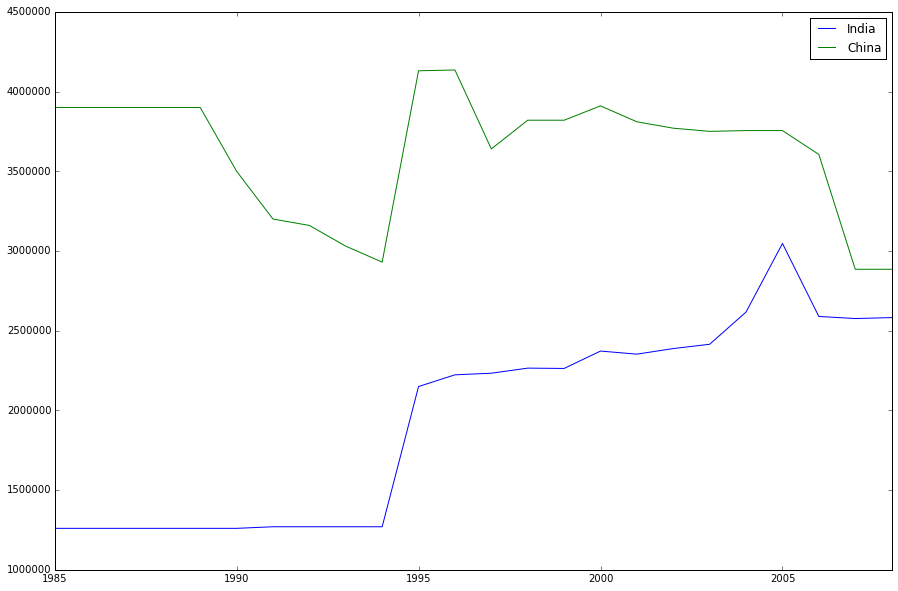

In [54]:
army2.T[["India", "China"]].plot()

China and India share borders, have historical rivalries, and are some of the world's biggest geopolitical actors, so it make sense that their trends are related: the big increase on the size of the two armies occur at the same time, and a big dip on one army is closely followed by a dip in the other

Top 10 biggest armies (average)

In [65]:
top10 = countries.T.sort("mean", ascending=False).head(10)

In [69]:
top10

,count,mean,std,min,25%,50%,75%,max
China,24,3624583.333333,390125.165719,2885000,3425000.0,3762500,3900000,4135000
India,24,1946316.666667,614788.203662,1260000,1267500.0,2228000,2394450,3047000
United States,24,1753479.166667,303170.348124,1420700,1524475.0,1584500,2127900,2240000
Russia,22,1618695.454545,214351.152656,1369700,1447500.0,1491050,1880750,1900000
"Korea, Dem. Rep.",24,1173791.666667,138379.512547,838000,1100000.0,1243500,1271000,1295000
Pakistan,24,740750.000000,180732.110186,482800,561250.0,834000,909000,923000
Vietnam,24,734625.000000,269780.889354,495000,524000.0,589500,1030250,1250000
Turkey,24,711341.666667,79586.933146,612000,656100.0,697000,786000,841200
"Korea, Rep.",24,680083.333333,42438.425130,598000,649250.0,687500,692250,750000
Egypt,24,620833.333333,169925.361919,424000,445937.5,675250,774750,866000


In [68]:
top10countries = list(top10.index)

Bottom 10 smallest armies (average)

In [70]:
bottom10 = countries.T.sort("mean", ascending=True).head(10)

In [71]:
bottom10

,count,mean,std,min,25%,50%,75%,max
Iceland,19,96.315789,35.933662,0,100.0,100,110.0,130
Antigua and Barbuda,24,159.583333,45.633623,0,147.5,170,200.0,200
Barbados,24,710.833333,144.731135,600,600.0,610,810.0,1000
Seychelles,24,895.833333,378.531679,450,487.5,1000,1252.5,1300
Timor-Leste,10,900.000000,316.227766,0,1000.0,1000,1000.0,1000
Belize,24,989.583333,125.956485,600,1000.0,1000,1062.5,1100
Sao Tome and Principe,20,1000.000000,0.000000,1000,1000.0,1000,1000.0,1000
Gambia,24,1037.500000,424.686585,480,800.0,830,1000.0,2000
Luxembourg,24,1238.750000,285.370278,700,1000.0,1380,1500.0,1612
Equatorial Guinea,24,1367.500000,405.561875,1000,1000.0,1300,1600.0,2300


In [72]:
bottom10countries = list(bottom10.index)

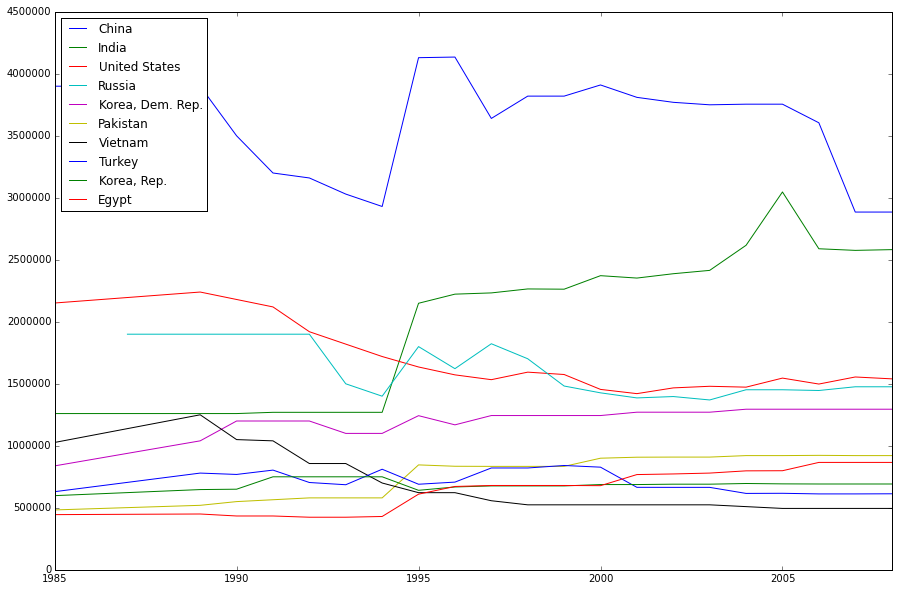

In [83]:
army2.T[top10countries].plot()

Its necessary to use log scale to put the two groups on the same plot. The differences are of 3 or 4 orders of magnitude

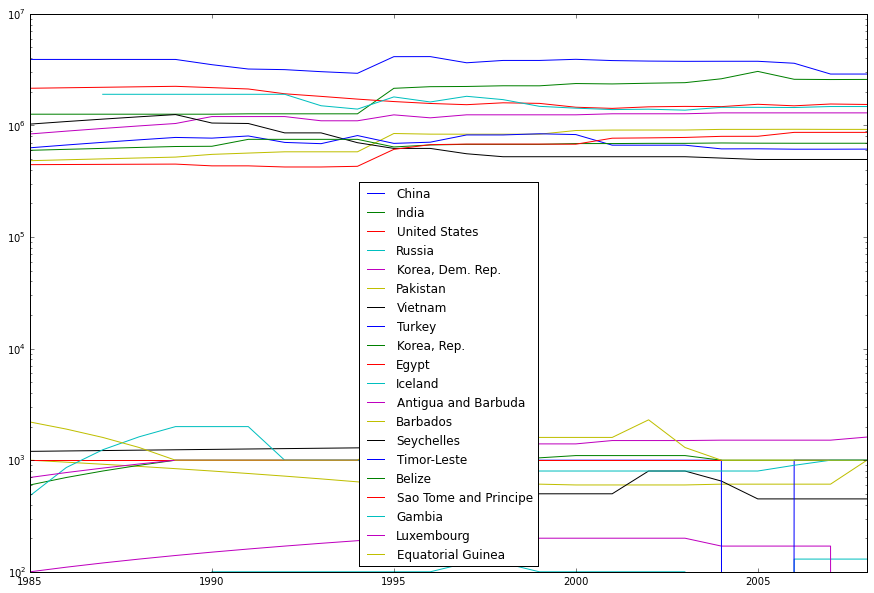

In [80]:
army2.T[top10countries+bottom10countries].plot(logy=True)

### Building a predictive model

Linear regression models could be used to predict the next years that are not included in the data. However, given the differences between countries, its necessary to create a model for each country.

We'll model North Korea:

In [85]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [120]:
X = np.array(army2.columns)
y = np.array(army2.loc["Korea, Dem. Rep.",])
X = X.reshape((24,1))
y = y.reshape((24,1))

In [138]:
clf = clf.fit(X,y)

In [139]:
clf.coef_

array([[ 16947.39130435]])

This means that North Korea is adding almost 17 thousand soldiers to its army every year

In [141]:
clf.predict([[2009]])

array([[ 1385634.05797102]])

Now we'll model USA

In [143]:
X = np.array(army2.columns)
y = np.array(army2.loc["United States",])
X = X.reshape((24,1))
y = y.reshape((24,1))

In [144]:
clf = clf.fit(X,y)
clf.coef_

array([[-38029.]])

United States is reducing its army by 38 thousand soldiers every year

However these are only historical trends, doesn't model geopolitical or economical events, and are only valid nearby the years where we have data. We can use the model to predict the year 2010 with some confidence; but not 2020, for example